In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from scipy.stats import linregress

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
data_path = '../input/data.xlsx'
sheet_name = 'Data'

df_data = pd.read_excel(data_path, sheet_name = sheet_name)

In [63]:
df_data.head()

,paper_number,gen_info,env_info,good,no_of_designs,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,precursor,enzyme_steps,atp_cost,nadh_nadph_cost,yield,yield_o,yield2,titer,rate,fermentation_time,bio_titre,bio_growth_rate
0,1,1.0,1.0,1,1,9.0,92.09,2714.735585,3.0,8.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,6.00,LB,30.0,1.0,BL21 (DE3) (-fadD),"ompT, gal, dcm, lon, hsdSb, lacI, T7 RNApolyme...","0,0,0,0,0,1,1,1,0","accB, accC, accD, accA, tesA","0,0,0,0,0","1,1,1,1,1","0,0,0,0,1","0,0,0,0,1","0,0,0,0,0","0,0,0,0,0","0,0,0,0,0","0,0,0,0,0",0,0,fatty acid,14.0,28.0,3.0,0.0,244.0,acetyl-CoA,7.0,7.0,14.0,0.060000,NaN,0.04,0.936,0.187500,NaN,NaN,NaN
1,2,0.0,1.0,1,1,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","0,0,0,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fatty acid,12.0,24.0,2.0,0.0,200.0,acetyl-CoA,7.0,5.0,10.0,0.012011,NaN,NaN,1.000,0.041667,24.0,NaN,NaN
2,2,1.0,1.0,1,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","0,0,0,0","prpE, tesAuc","0,0","1,1","1,1","1,4","0,0","0,0","0,0","0,0",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,acetyl-CoA,7.0,5.0,10.0,0.016335,NaN,NaN,1.360,0.028333,48.0,NaN,NaN
3,2,1.0,1.0,1,3,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","0,0,0,0","prpE, tesAuc","0,0","1,1","1,1","1,4","0,0","0,0","0,0","0,0",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,acetyl-CoA,7.0,5.0,10.0,0.016947,NaN,NaN,1.411,0.029396,48.0,NaN,NaN
4,2,1.0,1.0,1,4,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","0,0,0,0","prpE, tesArc","0,0","1,1","1,1","1,4","0,1","0,0","0,0","0,0",0,0,fatty acid,16.0,32.0,2.0,0.0,256.0,acetyl-CoA,7.0,7.0,14.0,0.019818,NaN,NaN,1.650,0.068750,24.0,NaN,NaN


In [64]:

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   paper_number                             1209 non-null   int64  
 1   gen_info                                 1203 non-null   float64
 2   env_info                                 1203 non-null   float64
 3   good                                     1209 non-null   int64  
 4   no_of_designs                            1209 non-null   object 
 5   cs1                                      1191 non-null   float64
 6   cs1_mw                                   1105 non-null   float64
 7   cs_conc1                                 1175 non-null   float64
 8   CS_C1                                    1105 non-null   float64
 9   CS_H1                                    1105 non-null   float64
 10  CS_O1                                    1105 no

In [65]:
df_data.describe()

,paper_number,gen_info,env_info,good,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,temp,oxygen,no_C,no_H,no_O,no_N,mw,enzyme_steps,atp_cost,nadh_nadph_cost,yield,yield_o,yield2,titer,rate,fermentation_time,bio_titre
count,1209.000000,1203.000000,1203.000000,1209.000000,1191.000000,1105.000000,1175.000000,1105.000000,1105.000000,1105.000000,1209.000000,1193.000000,1209.000000,1193.000000,1193.000000,1193.000000,1209.000000,1209.000000,1209.000000,1116.000000,1116.000000,1116.000000,1080.000000,1071.000000,1159.000000,1097.000000,1205.000000,1205.000000,1205.000000,1205.00000,1179.000000,529.000000,373.000000,390.000000,769.000000,77.000000,177.000000,1128.000000,782.000000,975.000000,282.000000
mean,50.647643,0.924356,0.883624,0.980976,3.967254,168.077376,276.874662,5.610860,11.561086,5.564706,0.459884,3.933772,14.703952,0.131601,0.235541,0.130763,0.006617,0.221017,0.051017,0.008065,0.013441,0.008065,1.161111,0.640168,34.590164,1.860529,6.999170,12.980083,2.458921,0.06473,135.884749,5.319471,2.715818,6.755769,1.727243,3.825614,17.833387,25.180578,0.401238,68.655903,4.987187
std,31.135305,0.264538,0.320808,0.136666,4.418042,52.629842,543.878939,1.867599,2.853317,1.712492,2.259693,22.441868,153.157140,0.755483,1.425679,0.742751,0.167636,5.752646,1.644718,0.200733,0.370188,0.200733,0.534246,1.620967,3.371414,0.747051,7.291794,11.639930,1.320430,0.42449,99.679142,2.699260,3.405355,5.783403,9.691727,16.131892,52.500527,71.991499,1.098821,158.369221,11.215627
min,1.000000,0.000000,0.000000,0.000000,1.000000,87.050000,0.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.003000,25.000000,1.000000,0.000000,2.000000,0.000000,0.00000,2.000000,1.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.070000
25%,26.000000,1.000000,1.000000,1.000000,1.000000,180.160000,108.589423,6.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,30.000000,1.000000,3.000000,6.000000,1.000000,0.00000,75.040000,2.000000,0.000000,1.000000,0.057600,0.296360,1.076923,0.497650,0.015423,24.000000,0.533750
50%,45.000000,1.000000,1.000000,1.000000,1.000000,180.160000,138.765542,6.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.080000,37.000000,2.000000,4.000000,6.000000,2.000000,0.00000,118.000000,6.000000,0.000000,4.000000,0.255088,0.733071,6.795455,2.597135,0.058333,40.000000,1.280000
75%,78.000000,1.000000,1.000000,1.000000,9.000000,180.160000,277.531083,6.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.350000,37.000000,2.000000,9.000000,12.000000,4.000000,0.00000,152.000000,7.000000,6.000000,12.000000,0.682609,0.939348,22.560000,14.802830,0.367909,72.000000,2.200000
max,109.000000,1.000000,1.000000,1.000000,21.000000,342.300000,7806.760000,12.000000,22.000000,11.000000,21.000000,342.300000,2251.950000,12.000000,22.000000,11.000000,5.000000,180.160000,57.000000,6.000000,12.000000,6.000000,3.000000,13.000000,42.000000,3.000000,40.000000,56.000000,5.000000,4.00000,641.610000,11.000000,9.000000,19.000000,93.955000,84.065000,510.612245,733.000000,14.940000,1440.000000,63.000000


# General aprroach for data cleaning

Stage 0: Remove unimportant features, features with too many missing values and non_targets

Stage 1: Remove outliers for the targets (yield, titer, rate). Remove rows where missing values for yield, titer and rate have no reasonable approach for imputation

Stage 2: For important features, impute values or remove rows where imputation is not reasonable

Stage 3: Split into train and test sets

Stage 4: Impute missing values for targets in train set. Then use same trainset-based strategy to impute missing target values in test set



# Stage 0: Remove features

paper_number: To be removed eventually but keep at the moment for reference

gen_info: Mostly 1. Variance not meaningful for target prediction

env_info: Mostly 1. Variance not meaningful for target prediction

good: Mostly 1. Variance not meaningful for target prediction

no_of_designs: Number labels for the different designs in each paper. 
Arbituary. Not particularly meaningful for target prediction

yield_o: yield in gProduct/g Carbon source consumed. Too many null values. Not designated as a target

yield2: yield in gProduct/g Biomass. Too many null values. Not designated as a target

bio_titre: Too many null values. Otherwise could have been useful because microbial growth is trade-off with production at some point

bio_growth_rate: Too many null values. Otherwise could have been useful because microbial growth is trade-off with production at some point

In [66]:
df_modified_0 = df_data.copy()
columns_to_drop = ['gen_info', 'env_info', 'good', 'no_of_designs', 'yield_o', 'yield2', 'bio_titre', 'bio_growth_rate', 'precursor', 'enzyme_steps', 'atp_cost', 'nadh_nadph_cost']
df_modified_0.drop(columns=columns_to_drop, inplace=True)

# Stage 1

Visualizing the targets 'titer', 'yield' and 'rate'

Then drop outliers 

<Axes: xlabel='titer', ylabel='Count'>

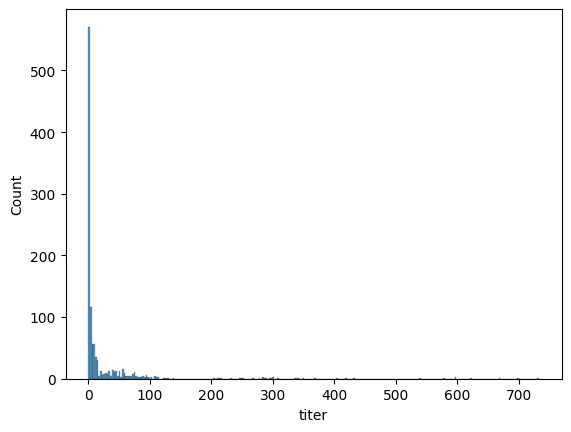

In [67]:
sns.histplot(data=df_data, x='titer')

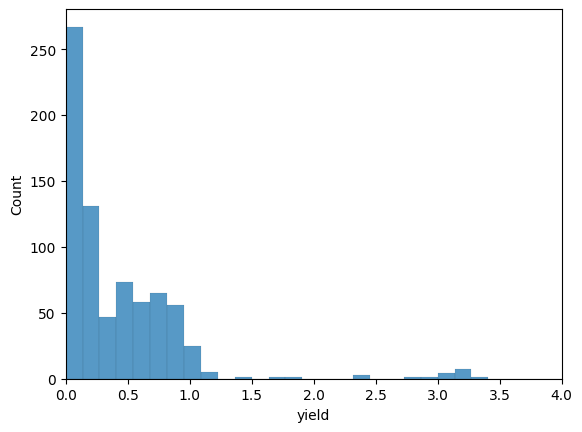

In [68]:
sns.histplot(data=df_data, x='yield')
plt.xlim(0, 4)
plt.show()

<Axes: xlabel='rate', ylabel='Count'>

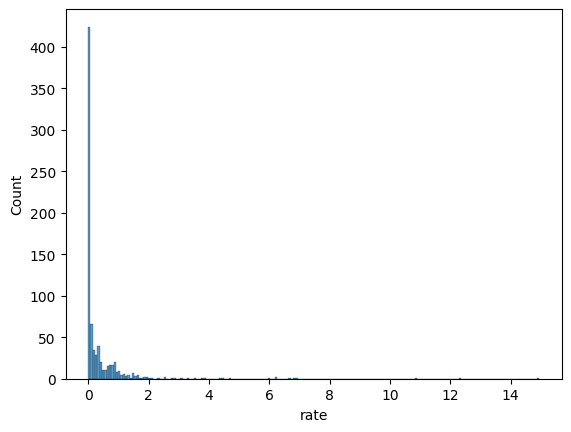

In [69]:
sns.histplot(data=df_data, x='rate')

In [70]:
df_modified_1 = df_modified_0.copy()

print("Number of rows where titer > 16: ", len(df_modified_1[df_modified_1['titer'] > 16]))
print("Number of rows where yield > 1.2: ", len(df_modified_1[df_modified_1['yield'] > 1.2]))
print("Number of rows where rate > 2: ", len(df_modified_1[df_modified_1['rate'] > 2]))

Number of rows where titer > 16:  268
Number of rows where yield > 1.2:  42
Number of rows where rate > 2:  24


In [71]:
# 75% percentile is around 16
df_modified_1.drop(df_modified_1[df_modified_1['titer'] > 16].index, axis=0, inplace=True)
df_modified_1.drop(df_modified_1[df_modified_1['yield'] > 1.2].index, axis=0, inplace=True)
df_modified_1.drop(df_modified_1[df_modified_1['rate'] > 2].index, axis=0, inplace=True)

Dropping rows where yield, titer and rate have missing values because
it's not possible to impute from fermentation_time alone

In [72]:
df_modified_1.drop(df_modified_1[df_modified_1['titer'].isna() & df_modified_1['yield'].isna() & df_modified_1['rate'].isna()].index, axis=0, inplace=True)

In [73]:
len(df_modified_1)

907

Dropping rows where both rate and fermentation time are missing. Cannot impute from each other

In [74]:
df_modified_1.drop(df_modified_1[df_modified_1['rate'].isna() & df_modified_1['fermentation_time'].isna()].index, axis=0, inplace=True)

In [75]:
len(df_modified_1)

841

# Stage 2

For important features, impute missing values or remove rows if imputation is not reasonable

### cs1: Types of first carbon source

Check cs1, cs1_mw, CS_C1, CS_H1, CS_O1 together

For missing values, can check using other entries in the same paper

Otherwise, check other rows with same media and strain background and pick the most common carbon source

No 3, 4, 5

1 ---> 180.16, 6, 12, 6

2 ---> 342.3, 12, 22, 11

9 ---> 92.09, 3, 8, 3

10 ---> Same as 1, so relabeled as 1

11 ---> Only row. No info on mw etc. Take ref from other rows in paper 64, therefore relabeled as 1

12 ---> 150.13, 5, 10, 5

13 ---> 342.297, 12, 22, 11

14 ---> Same as 13, so relabeled as 13

15 ---> 182.17, 6, 14, 6

16 ---> 196.16, 6, 12, 7

17 ---> Same as 12, so relabeled as 12

18, 19 ---> No other known values. Use the most common, therefore relabeled as 1

NA ---> For paper 77, cs1 = 1 for the other rows. For paper 7 and 65, not known so default to cs=1



In [76]:
df_modified_2 = df_modified_1.copy()

In [77]:
df_modified_2[(df_modified_2['cs1'] == 1) & (df_modified_2['cs1_mw'] != 180.16)]

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time
753,62,1.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,1.0,FUS4/pF81 (glucose),"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,5.500,0.1300,NaN
766,64,1.0,NaN,55.506217,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,YE,30.0,1.0,K12 pTLYCm4 pSNA,NaN,NaN,"dxs, ipiHP1, crtE, crtB, crtI, mvaE, mvaS, mva...","0,0,0,0,0,0,0,0,0,0,0","1,1,1,1,1,1,1,1,1,1,1","0,1,1,1,1,1,1,1,1,1,0","4,4,4,4,4,1,1,1,1,1,1","0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0",lycopene,40.0,56.0,0.0,0.0,536.873,NaN,0.033,0.0009,38.0
820,69,1.0,NaN,99.911190,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,5.0,M9,37.0,1.0,EYX-2,"lacZ, hsdR, araB, araA, araD, rhaB, rhaA, rhaD...","0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,glycolate,2.0,3.0,3.0,0.0,75.040,NaN,8.960,NaN,24.0


In [78]:
indices_to_update_cs1 = [753, 766, 820]

df_modified_2.loc[indices_to_update_cs1, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1, 'CS_O1'] = 6

In [79]:
df_modified_2[(df_modified_2['cs1'] == 9) & (df_modified_2['cs1_mw'] != 92.09)]
# df_modified_2[(df_modified_2['cs1'] == 5)]

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time
750,61,9.0,NaN,108.589423,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,2.0,YE,37.0,1.0,BL21 DE3 phenylalanine dehydrogenase pET-17b,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1",PheDH,0,1,1,4,0,0,0,0,0,0,l-phenylalanine,9.0,11.0,2.0,1.0,165.190,0.48,3.800,NaN,36.0
751,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,1.0,FUS4/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,7.900,0.2100,NaN
752,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,3.0,FUS4/pF81 (20% O2),"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,9.400,0.2600,NaN
754,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,3.0,"FUS4/pF81 (crude glycerol, 20% O2)","rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,10.000,0.2200,NaN
755,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,1.0,FUS4.5/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,9.700,0.2300,NaN
756,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,1.0,FUS4.6/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,7.300,0.2500,NaN
757,62,9.0,NaN,54.294712,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,3.0,1.5,M9,37.0,1.0,FUS4.7/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,10.100,0.3700,NaN
758,63,9.0,NaN,325.768270,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,YE,37.0,1.0,BL21 (DE3) pPheDH,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1",phedh,0,1,1,4,0,0,0,0,0,0,l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,0.220,NaN,240.0
759,63,9.0,NaN,325.768270,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,YE,37.0,1.0,BL21 (DE3) pPheDH,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1",phedh,0,1,1,4,0,0,0,0,0,0,l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,0.230,NaN,240.0
760,63,9.0,NaN,325.768270,NaN,NaN,NaN,0,0.0,0.000000,0.0,0.0,0.0,0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,YE,37.0,1.0,BL21 (DE3) pPY,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1","phedh, yddG","0,0","1,1","1,0","12,12","0,0","0,0","0,0","0,0","0,0","0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,0.030,NaN,240.0


In [80]:
indices_to_update_cs1_equal_9 = df_modified_2[(df_modified_2['cs1'] == 9) & (df_modified_2['cs1_mw'] != 92.09)].index
df_modified_2.loc[indices_to_update_cs1_equal_9, 'cs1_mw'] = 92.09
df_modified_2.loc[indices_to_update_cs1_equal_9, 'CS_C1'] = 3
df_modified_2.loc[indices_to_update_cs1_equal_9, 'CS_H1'] = 8
df_modified_2.loc[indices_to_update_cs1_equal_9, 'CS_O1'] = 3

In [81]:
# df_modified_2[(df_modified_2['cs1'] == 1) & (df_modified_2['cs1_mw'] != 180.16)]
indices_to_update_cs1_equal_10 = df_modified_2[(df_modified_2['cs1'] == 10)].index
df_modified_2.loc[indices_to_update_cs1_equal_10, 'cs1'] = 1
df_modified_2.loc[indices_to_update_cs1_equal_10, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1_equal_10, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_10, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_10, 'CS_O1'] = 6

In [82]:
# df_modified_2[(df_modified_2['cs1'] == 1) & (df_modified_2['cs1_mw'] != 180.16)]
indices_to_update_cs1_equal_11 = df_modified_2[(df_modified_2['cs1'] == 11)].index
df_modified_2.loc[indices_to_update_cs1_equal_11, 'cs1'] = 1
df_modified_2.loc[indices_to_update_cs1_equal_11, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1_equal_11, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_11, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_11, 'CS_O1'] = 6

In [83]:
indices_to_update_cs1_equal_12 = df_modified_2[(df_modified_2['cs1'] == 12) & (df_modified_2['cs1_mw'] != 150.13)].index
df_modified_2.loc[indices_to_update_cs1_equal_12, 'cs1_mw'] = 150.13
df_modified_2.loc[indices_to_update_cs1_equal_12, 'CS_C1'] = 5
df_modified_2.loc[indices_to_update_cs1_equal_12, 'CS_H1'] = 10
df_modified_2.loc[indices_to_update_cs1_equal_12, 'CS_O1'] = 5

In [84]:
indices_to_update_cs1_equal_13 = df_modified_2[(df_modified_2['cs1'] == 13) & (df_modified_2['cs1_mw'] != 342.297)].index
df_modified_2.loc[indices_to_update_cs1_equal_13, 'cs1_mw'] = 342.297
df_modified_2.loc[indices_to_update_cs1_equal_13, 'CS_C1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_13, 'CS_H1'] = 22
df_modified_2.loc[indices_to_update_cs1_equal_13, 'CS_O1'] = 11

In [85]:
indices_to_update_cs1_equal_14 = df_modified_2[(df_modified_2['cs1'] == 14)].index
df_modified_2.loc[indices_to_update_cs1_equal_14, 'cs1'] = 13
df_modified_2.loc[indices_to_update_cs1_equal_14, 'cs1_mw'] = 342.297
df_modified_2.loc[indices_to_update_cs1_equal_14, 'CS_C1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_14, 'CS_H1'] = 22
df_modified_2.loc[indices_to_update_cs1_equal_14, 'CS_O1'] = 11

In [86]:
indices_to_update_cs1_equal_15 = df_modified_2[(df_modified_2['cs1'] == 15) & (df_modified_2['cs1_mw'] != 182.17)].index
df_modified_2.loc[indices_to_update_cs1_equal_15, 'cs1_mw'] = 182.17
df_modified_2.loc[indices_to_update_cs1_equal_15, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_15, 'CS_H1'] = 14
df_modified_2.loc[indices_to_update_cs1_equal_15, 'CS_O1'] = 6

In [87]:
indices_to_update_cs1_equal_16 = df_modified_2[(df_modified_2['cs1'] == 16) & (df_modified_2['cs1_mw'] != 196.16)].index
df_modified_2.loc[indices_to_update_cs1_equal_16, 'cs1_mw'] = 196.16
df_modified_2.loc[indices_to_update_cs1_equal_16, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_16, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_16, 'CS_O1'] = 7

In [88]:
indices_to_update_cs1_equal_17 = df_modified_2[(df_modified_2['cs1'] == 17)].index
df_modified_2.loc[indices_to_update_cs1_equal_17, 'cs1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_17, 'cs1_mw'] = 150.13
df_modified_2.loc[indices_to_update_cs1_equal_17, 'CS_C1'] = 5
df_modified_2.loc[indices_to_update_cs1_equal_17, 'CS_H1'] = 10
df_modified_2.loc[indices_to_update_cs1_equal_17, 'CS_O1'] = 5

In [89]:
indices_to_update_cs1_equal_18 = df_modified_2[(df_modified_2['cs1'] == 18)].index
df_modified_2.loc[indices_to_update_cs1_equal_18, 'cs1'] = 1
df_modified_2.loc[indices_to_update_cs1_equal_18, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1_equal_18, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_18, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_18, 'CS_O1'] = 6

In [90]:
indices_to_update_cs1_equal_19 = df_modified_2[(df_modified_2['cs1'] == 19)].index
df_modified_2.loc[indices_to_update_cs1_equal_19, 'cs1'] = 1
df_modified_2.loc[indices_to_update_cs1_equal_19, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1_equal_19, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_19, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_19, 'CS_O1'] = 6

In [91]:
indices_to_update_cs1_equal_na = df_modified_2[(df_modified_2['cs1'].isna())].index
df_modified_2.loc[indices_to_update_cs1_equal_na, 'cs1'] = 1
df_modified_2.loc[indices_to_update_cs1_equal_na, 'cs1_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs1_equal_na, 'CS_C1'] = 6
df_modified_2.loc[indices_to_update_cs1_equal_na, 'CS_H1'] = 12
df_modified_2.loc[indices_to_update_cs1_equal_na, 'CS_O1'] = 6

### cs2: Types of second carbon source

In [92]:
display(len(df_modified_2[(df_modified_2['cs2_mw'].isna())]))

df_modified_2.loc[df_modified_2[(df_modified_2['cs2'] == 10)].index, 'cs2'] = 1
df_modified_2.loc[df_modified_2[(df_modified_2['cs2'] == 17)].index, 'cs2'] = 12
df_modified_2.loc[df_modified_2[(df_modified_2['cs2'] == 19)].index, 'cs2'] = 1
df_modified_2.loc[df_modified_2[(df_modified_2['cs2'] == 21)].index, 'cs2'] = 1

16

In [93]:
indices_to_update_cs2_equal_1 = df_modified_2[(df_modified_2['cs2'] == 1) & (df_modified_2['cs2_mw'].isna())].index
df_modified_2.loc[indices_to_update_cs2_equal_1, 'cs2_mw'] = 180.16
df_modified_2.loc[indices_to_update_cs2_equal_1, 'CS_C2'] = 6
df_modified_2.loc[indices_to_update_cs2_equal_1, 'CS_H2'] = 12
df_modified_2.loc[indices_to_update_cs2_equal_1, 'CS_O2'] = 6

In [94]:
indices_to_update_cs2_equal_12 = df_modified_2[(df_modified_2['cs2'] == 12) & (df_modified_2['cs2_mw'].isna())].index
df_modified_2.loc[indices_to_update_cs2_equal_12, 'cs2_mw'] = 150.13
df_modified_2.loc[indices_to_update_cs2_equal_12, 'CS_C2'] = 5
df_modified_2.loc[indices_to_update_cs2_equal_12, 'CS_H2'] = 10
df_modified_2.loc[indices_to_update_cs2_equal_12, 'CS_O2'] = 5

### cs3: Types of third carbon source

In [95]:
indices_to_update_CSC3_equal_na = df_modified_2[df_modified_2['CS_C3'].isna()].index
#df_modified_temp.loc[indices_to_update_CSC3_equal_na, ['CS_C3']].fillna(value=0, inplace=True)
df_modified_2[['CS_C3', 'CS_H3', 'CS_O3']] = df_modified_2[['CS_C3', 'CS_H3', 'CS_O3']].fillna(0)
display(df_modified_2.loc[indices_to_update_CSC3_equal_na])

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time
750,61,9.0,92.090,108.589423,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.000,YE,37.0,1.0,BL21 DE3 phenylalanine dehydrogenase pET-17b,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1",PheDH,0,1,1,4,0,0,0,0,0,0,l-phenylalanine,9.0,11.0,2.0,1.0,165.190,0.48,3.80000,NaN,36.0
751,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,1.0,FUS4/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,7.90000,0.2100,NaN
752,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,3.0,FUS4/pF81 (20% O2),"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,9.40000,0.2600,NaN
753,62,1.0,180.160,NaN,6.0,12.0,6.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,1.0,FUS4/pF81 (glucose),"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,5.50000,0.1300,NaN
754,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,3.0,"FUS4/pF81 (crude glycerol, 20% O2)","rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,10.00000,0.2200,NaN
755,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,1.0,FUS4.5/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,9.70000,0.2300,NaN
756,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,1.0,FUS4.6/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,7.30000,0.2500,NaN
757,62,9.0,92.090,54.294712,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.500,M9,37.0,1.0,FUS4.7/pF81,"rrnD, rrnE, rph, pheA, tyrA, aroF, lac, aroF, ...","0,0,0,0,0,0,0,1,1,1,0,1,0,1","aroF, pheA, aroB, aroL","0,0,0,0","1,1,1,1","0,0,0,0","3,3,3,3","0,0,0,0","0,0,0,0","0,1,0,0","0,0,0,0","0,0,0,0","0,0,0,0",l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,10.10000,0.3700,NaN
758,63,9.0,92.090,325.768270,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,YE,37.0,1.0,BL21 (DE3) pPheDH,"ompT, hsdSb, gal, dcm, T7 RNA polymerase","0,0,0,0,1",phedh,0,1,1,4,0,0,0,0,0,0,l-phenylalanine,9.0,11.0,2.0,1.0,165.190,NaN,0.22000,NaN,240.0
759,63,9.0,92.090,325.768270,3.0,8.0,3.0,0,0.00,0.000000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,YE,37.0,1.0,BL21 (DE3) pPheDH,"ompT, hsdSb, gal, dcm,

# Stage 2b

cs_conc1, reactor_type, rxt_volume, media, temp, oxygen 

In [96]:
df_modified_2b = df_modified_2.copy()

In [97]:
df_modified_2b.groupby('cs1')['cs_conc1'].mean()
#df_modified_2b.cs1.dtype

cs1
1.0     147.206617
9.0     259.043776
12.0    177.479290
13.0    114.495251
15.0    109.637794
16.0    108.589423
Name: cs_conc1, dtype: float64

In [98]:
df_modified_2b['cs_conc1'] = df_modified_2b['cs_conc1'].fillna(147.206617)
df_modified_2b[df_modified_2b['cs_conc1'].isna()]

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time


Reactor type 1 is the most common. Therefore used to impute missing values

In [99]:
df_modified_2b['reactor_type'] = df_modified_2b['reactor_type'].fillna(1)

In [100]:
df_modified_2b.groupby('reactor_type')['rxt_volume'].mean()

reactor_type
1.0    0.314546
2.0    0.100000
3.0    1.969697
Name: rxt_volume, dtype: float64

In [101]:
# All missing rxt volume values are associated with reactor type 1
df_modified_2b['rxt_volume'] = df_modified_2b['rxt_volume'].fillna(0.314546)

In [102]:
# Identify value is "NBS" from other rows from paper 77
df_modified_2b['media'] = df_modified_2b['media'].fillna("NBS")

In [103]:
# Determine mode for reactor_type + media + oxygen groups
df_modified_2b.groupby(['reactor_type', 'media', 'oxygen'])['temp'].apply(lambda x: x.mode().iloc[0])

reactor_type  media  oxygen
1.0           AM2    2.0       37.0
              LB     1.0       30.0
                     2.0       37.0
                     3.0       37.0
              M9     1.0       30.0
                     2.0       37.0
                     3.0       37.0
              MOPS   2.0       37.0
                     3.0       37.0
              NBS    2.0       37.0
                     3.0       37.0
              RICH   1.0       30.0
                     2.0       37.0
              TB     1.0       30.0
                     2.0       37.0
                     3.0       30.0
              YE     1.0       30.0
                     2.0       30.0
                     3.0       37.0
3.0           LB     1.0       30.0
              M9     1.0       37.0
                     3.0       37.0
              YE     1.0       30.0
                     2.0       30.0
Name: temp, dtype: float64

In [104]:
# Square bracket the index to return as a dataframe instead of series
df_modified_2b.loc[[892], "temp"] = 37  # From other rows in paper 77
df_modified_2b.loc[[1081, 1086], "temp"] = 37 # From paper 25 where reactor type, rxt_volume, media are the same
df_modified_2b.loc[df_modified_2b[df_modified_2b["paper_number"]==108].index, "temp"] = 30 # From mode of reactor_type 1.0, media YE, oxygen 2.0

Oxygen levels
1: Aerobic
2: Anaerobic
3: Microaerobic


Information from papers
Paper 34: Microaerobic -> 3
Paper 60: Aerobic -> 1
Paper 70: Aerobic -> 1
Paper 77: Aerobic -> 1
Paper 96: Microaerobic -> 3
Paper 100: Anaerobic -> 2
Paper 109: 2% of saturation -> 3

In [105]:
# Important to add parantheses to each condition on both sides of &
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 34) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 3
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 60) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 1
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 70) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 1
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 77) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 1
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 96) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 3
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 100) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 2
df_modified_2b.loc[df_modified_2b[(df_modified_2b.paper_number == 109) & (df_modified_2b.oxygen.isna())].index, "oxygen"] = 3

Details of product with missing values all come from Paper 10. Most common is 16 no_C, 32 no_H, 2 no_O, 0 no_N, 256 mw

In [106]:
df_modified_2b.loc[df_modified_2b[df_modified_2b.no_C.isna()].index, ['no_C', 'no_H', 'no_O', 'no_N', 'mw']] = [16, 32, 2, 0, 256]

In [107]:
df_modified_2c = df_modified_2b.copy()

Precursor information
precursor, enzyme_steps, atp_cost, nadh_nadph_cost

l-lactate ---> 6, 1, 0, 1 (6 likely to be pyruvate)
d-lactate ---> 6, 1, 0, 1
l-malate ---> 6, 8, 0, 2

In [108]:
# df_modified_2c.loc[df_modified_2c[(df_modified_2c.product_name == "l-lactate") & (df_modified_2c.precursor.isna())].index, ["precursor", "enzyme_steps", "atp_cost", "nadh_nadph_cost"]] = [6, 1, 0, 1]
# df_modified_2c.loc[df_modified_2c[(df_modified_2c.product_name == "d-lactate") & (df_modified_2c.precursor.isna())].index, ["precursor", "enzyme_steps", "atp_cost", "nadh_nadph_cost"]] = [6, 1, 0, 1]
# df_modified_2c.loc[df_modified_2c[(df_modified_2c.product_name == "l-malate") & (df_modified_2c.precursor.isna())].index, ["precursor", "enzyme_steps", "atp_cost", "nadh_nadph_cost"]] = [6, 8, 0, 2]

Too many missing values in precursor and associated details. Even known values of precursors are
expressed in numerical labels and the enzyme_steps can be subjective depending on what precursor in central
metabolism is chosen.

To ignore these columns. Product mw and elemental details should capture some information how easy/difficult to produce

In [109]:
# display(df_modified_2c[df_modified_2c.product_name == "succinate"]["precursor"].mode())
# display(df_modified_2c[df_modified_2c.product_name == "succinate"]["enzyme_steps"].mode())
# display(df_modified_2c[df_modified_2c.product_name == "succinate"]["atp_cost"].mode())
# display(df_modified_2c[df_modified_2c.product_name == "succinate"]["nadh_nadph_cost"].mode())

# df_modified_2c.loc[df_modified_2c[(df_modified_2c.product_name == "succinate") & (df_modified_2c.precursor.isna())].index, ["precursor", "enzyme_steps", "atp_cost", "nadh_nadph_cost"]] = [4, 6, 0, 1]


In [110]:
df_modified_2c["mw"] = df_modified_2c["mw"].fillna(256)


In [111]:
df_modified_2c.drop(df_modified_2c[df_modified_2c['strain_background'].isna()].index, axis=0, inplace=True)

In [112]:
df_modified_2c.drop(df_modified_2c[df_modified_2c['strain_background_genotype'].isna()].index, axis=0, inplace=True)

In [113]:
df_modified_2c["genes_modified"] = df_modified_2c["genes_modified"].fillna("nil")

In [114]:
# Function to convert column into a list of numbers
# Existing values: "0,0,0,0" (str), 0 (int) and nan (float)

def convert_to_zeroes_list(df, reference, feature):
    """ Convert details of genes_modified or strain_background_genotype into correct lists

        If string (e.g. 0,1,0,0) is already present, then convert to list [0,1,0,0]
        If int (e.g. 0) is present because only one gene, then convert to single element list [0]
        If NaN, then check the number of genes in the reference columns and input same number of zeros in a list
    
        Parameters:
        __________
        df: pandas DataFrame
            DataFrame containing the columns to manipulate

        reference: str
            Heading of the column containing the list of genes 
        
        feature: str
            Heading of the column containing the details which are to be converted into lists
        
        Returns:
        ________
        None
    """
    for index, row in df.iterrows():
        if isinstance(row[feature], str):
            # Cannot assign to row[feature], which is just a variable in local scope and doesn't change df
            df.at[index, feature] = list(map(int, row[feature].split(',')))
        elif isinstance(row[feature], int):
            df.loc[index, feature] = [row[feature]]
        elif pd.isna(row[feature]):
            df.at[index, feature] = [0] * len(row[reference].split(", "))


In [115]:
df_modified_2d = df_modified_2c.copy()

# Take care of an improper value '1,1,'
df_modified_2d.loc[df_modified_2d[df_modified_2d['heterologous_gene']=='1,1,'].index, "heterologous_gene"] = '1,1'

convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'gene_deletion')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'gene_overexpression')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'heterologous_gene')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'replication_origin')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'codon_optimization')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'sensor_regulator')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'enzyme_redesign_evolution')
convert_to_zeroes_list(df_modified_2d, 'genes_modified', 'protein_scaffold')

In [116]:
def clean_evo_opt(df, feature):
    for index, row in df.iterrows():
        if isinstance(row[feature], str):
            value = list(map(int, row[feature].split(',')))
            value_without_nan = [0 if np.isnan(x) else x for x in value]
            if any(element !=0 for element in value_without_nan):
                df.at[index, feature] = 1
            else:
                df.at[index, feature] = 0
        elif isinstance(row[feature], int):
            # Binarize single integers into either 0 or 1
            df.at[index, feature] = 0 if row[feature] == 0 else 1
        elif pd.isna(row[feature]):
            df.at[index, feature] = 0

In [117]:
clean_evo_opt(df_modified_2d, 'dir_evo')
clean_evo_opt(df_modified_2d, 'Mod_path_opt')

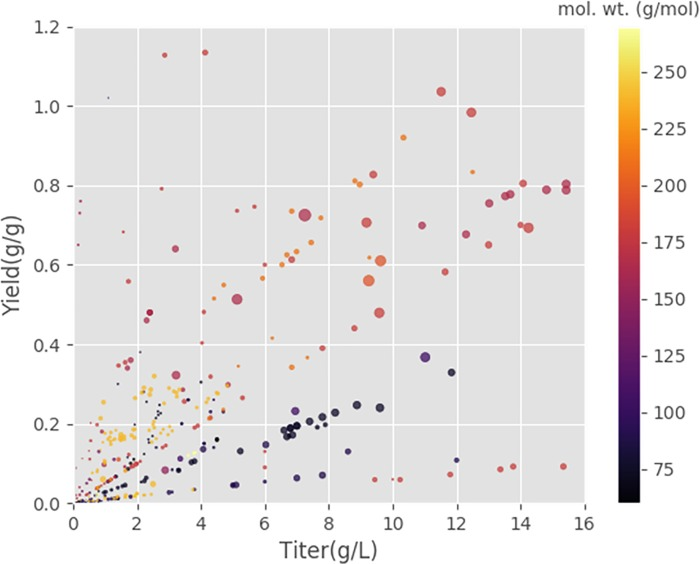

Yield and titer appears to be correlated reasonably well when the data is stratified by mol. wt. of product

Visualize the distribution of the mol. wt. of product

<Axes: xlabel='mw', ylabel='Count'>

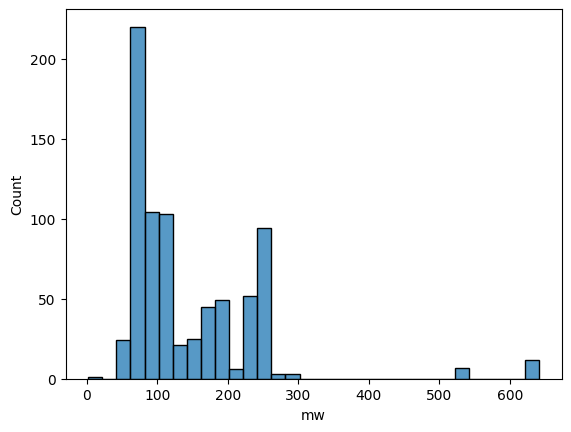

In [118]:
sns.histplot(data=df_modified_2d, x="mw", binwidth=20)

Text(0.5, 1.0, 'Scatter Plot with Heatmap Colors')

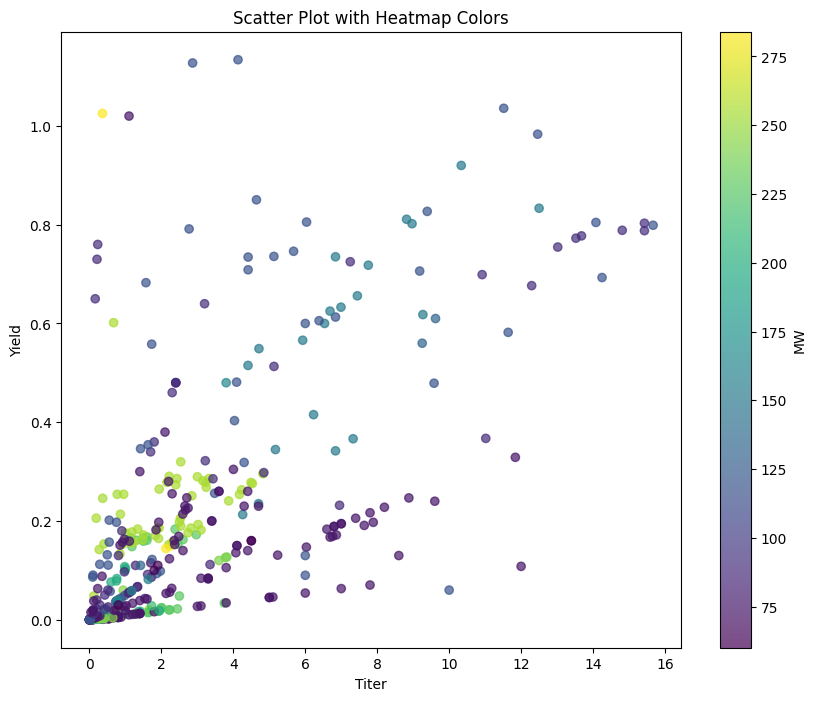

In [119]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data=df_modified_2d, x="titer", y="yield", c="mw", cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label='MW')

# Set labels and title
plt.xlabel('Titer')
plt.ylabel('Yield')
plt.title('Scatter Plot with Heatmap Colors')

In [121]:
# # Define bin edges
# bins = [float('-inf'), 80, 140, 220, 250, float('inf')]

# #labels
# labels = ['Grp1', 'Grp2', 'Grp3', 'Grp4', 'Grp5']

# # Create a new column for Grp based on binning
# df_modified_grp = df_modified.copy()
# df_modified_grp['Grp'] = pd.cut(df_modified_grp['mw'], bins=bins, labels=labels)

# grouped_data = dict(tuple(df_modified_grp.groupby('Grp')))

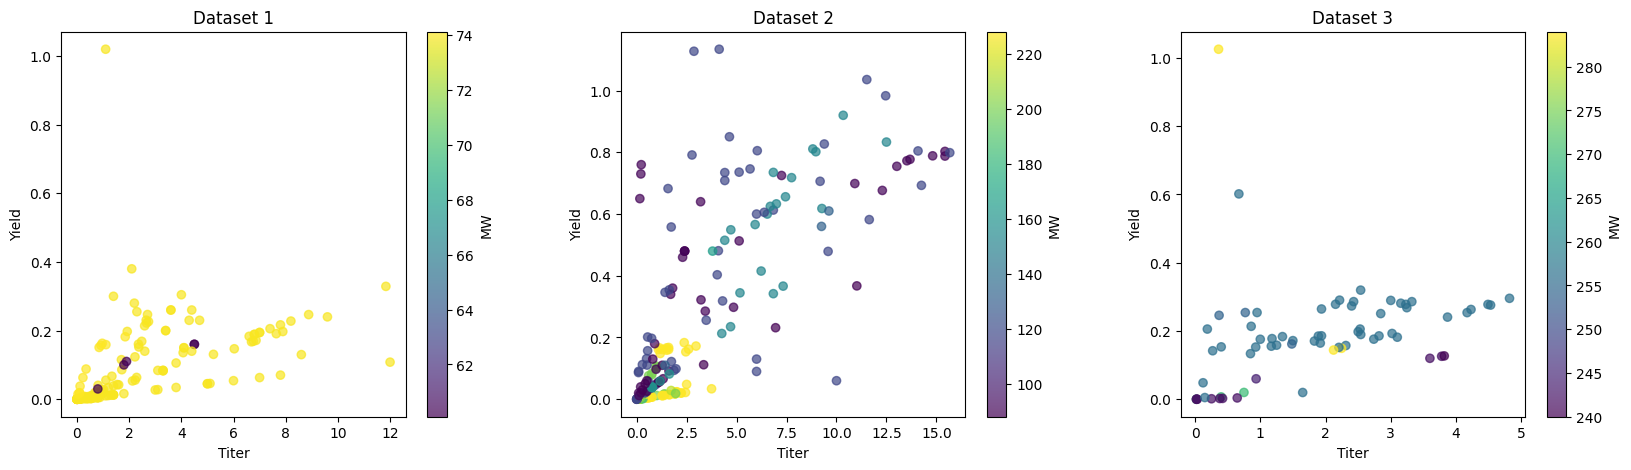

In [122]:
df_modified_grp1 = df_modified_2d[df_modified_2d['mw'] < 80]
df_modified_grp2 = df_modified_2d[(df_modified_2d['mw'] >= 80) & (df_modified_2d['mw'] < 230)]
df_modified_grp3 = df_modified_2d[df_modified_2d['mw'] >= 230]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
scatter_1 = axes[0].scatter(data=df_modified_grp1, x="titer", y="yield", c="mw", cmap="viridis", alpha=0.7)
axes[0].set_xlabel('Titer')
axes[0].set_ylabel('Yield')
axes[0].set_title('Dataset 1')
fig.colorbar(scatter_1, ax=axes[0], label='MW')

scatter_2 = axes[1].scatter(data=df_modified_grp2, x="titer", y="yield", c="mw", cmap="viridis", alpha=0.7)
axes[1].set_xlabel('Titer')
axes[1].set_ylabel('Yield')
axes[1].set_title('Dataset 2')
fig.colorbar(scatter_2, ax=axes[1], label='MW')

scatter_3 = axes[2].scatter(data=df_modified_grp3, x="titer", y="yield", c="mw", cmap="viridis", alpha=0.7)
axes[2].set_xlabel('Titer')
axes[2].set_ylabel('Yield')
axes[2].set_title('Dataset 3')
fig.colorbar(scatter_3, ax=axes[2], label='MW')

# Prevent overlap between subplot
fig.subplots_adjust(wspace=0.3)

plt.tight_layout

plt.show()

In [123]:
df_modified_grp1_nona = df_modified_grp1[['yield', 'titer']].dropna(how='any', axis=0)
df_modified_grp2_nona = df_modified_grp2[['yield', 'titer']].dropna(how='any', axis=0)
df_modified_grp3_nona = df_modified_grp3[['yield', 'titer']].dropna(how='any', axis=0)




yield_titer_corr = pd.DataFrame(linregress(df_modified_grp1_nona['titer'], df_modified_grp1_nona['yield'])).transpose()
yield_titer_corr = pd.concat([yield_titer_corr, pd.DataFrame(linregress(df_modified_grp2_nona['titer'], df_modified_grp2_nona['yield'])).transpose()])
yield_titer_corr = pd.concat([yield_titer_corr, pd.DataFrame(linregress(df_modified_grp3_nona['titer'], df_modified_grp3_nona['yield'])).transpose()])


yield_titer_corr.rename(columns={0: 'slope', 
                                 1: 'intercept', 
                                 2: 'r_value', 
                                 3: 'p_value', 
                                 4: 'std_err'}, inplace=True)

yield_titer_corr['r_squared'] = yield_titer_corr['r_value']**2

indices = ['<80', '80-230', '>230']

yield_titer_corr.index = indices

display(yield_titer_corr)


,slope,intercept,r_value,p_value,std_err,r_squared
<80,0.022940,0.032315,0.514483,3.264412e-13,0.002907,0.264693
80-230,0.057922,0.085856,0.747453,1.623082e-34,0.003795,0.558686
>230,0.030527,0.130156,0.271795,2.495371e-02,0.013305,0.073873


In [124]:
df_modified_2e = df_modified_2d.copy()

In [125]:
indices_to_update_titer_from_rate_time = df_modified_2e[df_modified_2e.titer.isna() & ~df_modified_2e.rate.isna() & ~df_modified_2e.fermentation_time.isna()].index

df_modified_2e.loc[indices_to_update_titer_from_rate_time, 'titer'] = df_modified_2e['rate'] * df_modified_2e['fermentation_time']

In [126]:
# Function to estimate titer using correlation with yield

def estimate_titer_from_yield(df):
    for index, row in df.iterrows():
        if (pd.isna(row['titer']) & ~pd.isna(row['yield'])):
            if row['mw'] < 80:
                df.at[index, 'titer'] = (row['yield'] - 0.032315)/0.022940
            if (row['mw'] >= 80) & (row['mw'] <= 230):
                df.at[index, 'titer'] = (row['yield'] - 0.085856)/0.057922
            if (row['mw'] > 230):
                df.at[index, 'titer'] = (row['yield'] - 0.130156)/0.030527
            


In [127]:
estimate_titer_from_yield(df_modified_2e)

In [128]:
# Function to estimate yield using correlation with titer

def estimate_yield_from_titer(df):
    for index, row in df.iterrows():
        if (pd.isna(row['yield']) & ~pd.isna(row['titer'])):
            if row['mw'] < 80:
                df.at[index, 'yield'] = row['titer'] * 0.02294 + 0.032315
            if (row['mw'] >= 80) & (row['mw'] <= 230):
                df.at[index, 'yield'] = row['titer'] * 0.057922 + 0.085856
            if (row['mw'] > 230):
                df.at[index, 'yield'] = row['titer'] * 0.030527 + 0.130156

In [129]:
estimate_yield_from_titer(df_modified_2e)

In [130]:
df_modified_2e.loc[df_modified_2e[df_modified_2e.fermentation_time.isna()].index, 'fermentation_time'] = df_modified_2e['titer'] / df_modified_2e['rate']

In [131]:
df_modified_2e.loc[df_modified_2e[df_modified_2e.rate.isna()].index, 'rate'] = df_modified_2e['titer'] / df_modified_2e['fermentation_time']


In [132]:
df_modified_2e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   paper_number                             769 non-null    int64  
 1   cs1                                      769 non-null    float64
 2   cs1_mw                                   769 non-null    float64
 3   cs_conc1                                 769 non-null    float64
 4   CS_C1                                    769 non-null    float64
 5   CS_H1                                    769 non-null    float64
 6   CS_O1                                    769 non-null    float64
 7   cs2                                      769 non-null    int64  
 8   cs2_mw                                   769 non-null    float64
 9   cs_conc2                                 769 non-null    float64
 10  CS_C2                                    769 non-null 

In [147]:
df_modified_2f = df_modified_2e.copy()

In [149]:
# function to convert strings of numbers into a list

def convert_string_to_list(df, feature):
    for index, row in df.iterrows():
        if isinstance(row[feature], str):
            df.at[index, feature] = list(map(int, row[feature].split(',')))
        elif isinstance(row[feature], int):
            df.loc[index, feature] = [row[feature]]


In [150]:
convert_string_to_list(df_modified_2f, 'strain_background_genotype_modification')

In [151]:
df_modified_2f.head()

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time
0,1,9.0,92.09,2714.735585,3.0,8.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,6.00,LB,30.0,1.0,BL21 (DE3) (-fadD),"ompT, gal, dcm, lon, hsdSb, lacI, T7 RNApolyme...","[0, 0, 0, 0, 0, 1, 1, 1, 0]","accB, accC, accD, accA, tesA","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0,0,fatty acid,14.0,28.0,3.0,0.0,244.0,0.060000,0.936,0.187500,4.992
1,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]",nil,[0],[0],[0],[0],[0],[0],[0],[0],0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.012011,1.000,0.041667,24.000
2,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesAuc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.016335,1.360,0.028333,48.000
3,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesAuc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.016947,1.411,0.029396,48.000
4,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesArc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 1]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,16.0,32.0,2.0,0.0,256.0,0.019818,1.650,0.068750,24.000


In [152]:
df_modified_2f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   paper_number                             769 non-null    int64  
 1   cs1                                      769 non-null    float64
 2   cs1_mw                                   769 non-null    float64
 3   cs_conc1                                 769 non-null    float64
 4   CS_C1                                    769 non-null    float64
 5   CS_H1                                    769 non-null    float64
 6   CS_O1                                    769 non-null    float64
 7   cs2                                      769 non-null    int64  
 8   cs2_mw                                   769 non-null    float64
 9   cs_conc2                                 769 non-null    float64
 10  CS_C2                                    769 non-null 

In [153]:
# Need to convert lists to strings so that it can be stored in sqlite3 database

df_modified_2f['strain_background_genotype_modification'] = df_modified_2f['strain_background_genotype_modification'].astype(str)
df_modified_2f['gene_deletion'] = df_modified_2f['gene_deletion'].astype(str)
df_modified_2f['gene_overexpression'] = df_modified_2f['gene_overexpression'].astype(str)
df_modified_2f['heterologous_gene'] = df_modified_2f['heterologous_gene'].astype(str)
df_modified_2f['replication_origin'] = df_modified_2f['replication_origin'].astype(str)
df_modified_2f['codon_optimization'] = df_modified_2f['codon_optimization'].astype(str)
df_modified_2f['sensor_regulator'] = df_modified_2f['sensor_regulator'].astype(str)
df_modified_2f['enzyme_redesign_evolution'] = df_modified_2f['enzyme_redesign_evolution'].astype(str)
df_modified_2f['protein_scaffold'] = df_modified_2f['protein_scaffold'].astype(str)


In [162]:
df_modified_2f['Mod_path_opt'][0]

0

In [155]:
df_modified_2f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 1207
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   paper_number                             769 non-null    int64  
 1   cs1                                      769 non-null    float64
 2   cs1_mw                                   769 non-null    float64
 3   cs_conc1                                 769 non-null    float64
 4   CS_C1                                    769 non-null    float64
 5   CS_H1                                    769 non-null    float64
 6   CS_O1                                    769 non-null    float64
 7   cs2                                      769 non-null    int64  
 8   cs2_mw                                   769 non-null    float64
 9   cs_conc2                                 769 non-null    float64
 10  CS_C2                                    769 non-null 

In [157]:
import sqlite3

database = '../input/data.sqlite'
conn = sqlite3.connect(database)


In [163]:
df_modified_2f.to_sql(name="cleaned_data", con=conn, if_exists="replace")
conn.close()

In [165]:
conn2 = sqlite3.connect(database)

# Read one row from database
query = """SELECT * from cleaned_data"""
res = conn2.execute(query)

print(res.fetchone())

(0, 1, 9.0, 92.09, 2714.735584754045, 3.0, 8.0, 3.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 6.0, 'LB', 30.0, 1.0, 'BL21  (DE3) (-fadD)', 'ompT, gal, dcm, lon, hsdSb, lacI, T7 RNApolymerase, malB, fadD', '[0, 0, 0, 0, 0, 1, 1, 1, 0]', 'accB, accC, accD, accA, tesA', '[0, 0, 0, 0, 0]', '[1, 1, 1, 1, 1]', '[0, 0, 0, 0, 1]', '[0, 0, 0, 0, 1]', '[0, 0, 0, 0, 0]', '[0, 0, 0, 0, 0]', '[0, 0, 0, 0, 0]', '[0, 0, 0, 0, 0]', 0, 0, 'fatty acid', 14.0, 28.0, 3.0, 0.0, 244.0, 0.06, 0.936, 0.1875, 4.992)


In [166]:
df_fromSQL = pd.read_sql_query(query, conn2, index_col="index")

df_fromSQL.head()

,paper_number,cs1,cs1_mw,cs_conc1,CS_C1,CS_H1,CS_O1,cs2,cs2_mw,cs_conc2,CS_C2,CS_H2,CS_O2,cs3,cs3_mw,cs_conc3,CS_C3,CS_H3,CS_O3,reactor_type,rxt_volume,media,temp,oxygen,strain_background,strain_background_genotype,strain_background_genotype_modification,genes_modified,gene_deletion,gene_overexpression,heterologous_gene,replication_origin,codon_optimization,sensor_regulator,enzyme_redesign_evolution,protein_scaffold,dir_evo,Mod_path_opt,product_name,no_C,no_H,no_O,no_N,mw,yield,titer,rate,fermentation_time
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,9.0,92.09,2714.735585,3.0,8.0,3.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,3.0,6.00,LB,30.0,1.0,BL21 (DE3) (-fadD),"ompT, gal, dcm, lon, hsdSb, lacI, T7 RNApolyme...","[0, 0, 0, 0, 0, 1, 1, 1, 0]","accB, accC, accD, accA, tesA","[0, 0, 0, 0, 0]","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 1]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0,0,fatty acid,14.0,28.0,3.0,0.0,244.0,0.060000,0.936,0.187500,4.992
1,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]",nil,[0],[0],[0],[0],[0],[0],[0],[0],0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.012011,1.000,0.041667,24.000
2,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesAuc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.016335,1.360,0.028333,48.000
3,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesAuc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 0]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,12.0,24.0,2.0,0.0,200.0,0.016947,1.411,0.029396,48.000
4,2,1.0,180.16,83.259325,6.0,12.0,6.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.05,LB,30.0,1.0,ML103 (-fadD),"ilvG, rfb, rph, fadD","[0, 0, 0, 0]","prpE, tesArc","[0, 0]","[1, 1]","[1, 1]","[1, 4]","[0, 1]","[0, 0]","[0, 0]","[0, 0]",0,0,fatty acid,16.0,32.0,2.0,0.0,256.0,0.019818,1.650,0.068750,24.000
